### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Min–max normalization :

Min-max normalization (usually called feature scaling) performs a linear transformation on the original data. This technique gets all the scaled data in the range (0, 1). The formula to achieve this is the following:

Min-max normalization preserves the relationships among the original data values. The cost of having this bounded range is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

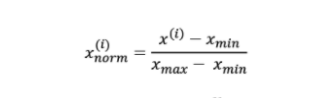

Data Scaling is a data preprocessing step for numerical features. Many machine learning algorithms like Gradient descent methods, KNN algorithm, linear and logistic regression, etc. require data scaling to produce good results. Various scalers are defined for this purpose. This article concentrates on Standard Scaler and Min-Max scaler. The task here is to discuss what they mean and how they are implemented using in-built functions that come with this package.


Apart from supporting library functions other functions that will be used to achieve the functionality are:

* The fit(data) method is used to compute the mean and std dev for a given feature so that it can be used further for scaling.
* The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
* The fit_transform() method does both fit and transform.

In [1]:
# import module
from sklearn.preprocessing import StandardScaler
 
# create data
data = [[11, 2], [3, 7], [0, 10], [11, 8]]
 
# compute required values
scaler = StandardScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)
 
# print scaled data
print(scaled_data)

[[ 0.97596444 -1.61155897]
 [-0.66776515  0.08481889]
 [-1.28416374  1.10264561]
 [ 0.97596444  0.42409446]]


### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

Unit Vector Scaling technique is done considering the whole feature vector to be of unit length,Unit vector scaling means dividing each component by the Euclidean length of the vector (L2 Norm),Unit Vector technique produces values of range [0,1]. When dealing with features with hard boundaries, this is quite useful ex. when dealing with image data, the colors can range from only 0 to 255.

we can use the Unit Vector Scaling technique using sklearn library sklearn.preprocessing.power_transform

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
df1=df.apply(lambda x:x/np.linalg.norm(x,1))
df1

,WEIGHT,PRICE
Orange,0.272727,0.090909
Apple,0.327273,0.272727
Banana,0.218182,0.181818
Grape,0.181818,0.454545


In [8]:
import matplotlib.pyplot as plt

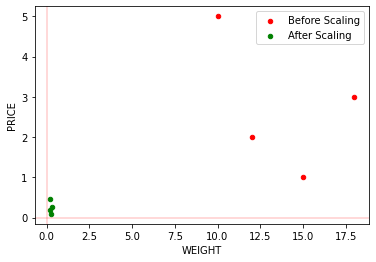

In [9]:
ax=df.plot.scatter(x="WEIGHT",y="PRICE",label="Before Scaling",color="red")
df1.plot.scatter(x="WEIGHT",y="PRICE",label="After Scaling",color="green",ax=ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Principal Component Analysis :

Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components. It is one of the popular tools that is used for exploratory data analysis and predictive modeling. It is a technique to draw strong patterns from the given dataset by reducing the variances.

PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

##### Steps for PCA algorithm :

* Getting the dataset : Firstly, we need to take the input dataset and divide it into two subparts X and Y, where X is the training set, and Y is the validation set.


* Representing data into a structure : Now we will represent our dataset into a structure. Such as we will represent the two-dimensional matrix of independent variable X. Here each row corresponds to the data items, and the column corresponds to the Features. The number of columns is the dimensions of the dataset.


* Standardizing the data : In this step, we will standardize our dataset. Such as in a particular column, the features with high variance are more important compared to the features with lower variance. If the importance of features is independent of the variance of the feature, then we will divide each data item in a column with the standard deviation of the column. Here we will name the matrix as Z.


* Calculating the Covariance of Z : To calculate the covariance of Z, we will take the matrix Z, and will transpose it. After transpose, we will multiply it by Z. The output matrix will be the Covariance matrix of Z.


* Calculating the Eigen Values and Eigen Vectors : Now we need to calculate the eigenvalues and eigenvectors for the resultant covariance matrix Z. Eigenvectors or the covariance matrix are the directions of the axes with high information. And the coefficients of these eigenvectors are defined as the eigenvalues.


* Sorting the Eigen Vectors :  In this step, we will take all the eigenvalues and will sort them in decreasing order, which means from largest to smallest. And simultaneously sort the eigenvectors accordingly in matrix P of eigenvalues. The resultant matrix will be named as P*.


* Calculating the new features Or Principal Components : Here we will calculate the new features. To do this, we will multiply the P* matrix to the Z. In the resultant matrix Z*, each observation is the linear combination of original features. Each column of the Z* matrix is independent of each other.


* Remove less or unimportant features from the new dataset : The new feature set has occurred, so we will decide here what to keep and what to remove. It means, we will only keep the relevant or important features in the new dataset, and unimportant features will be removed out.

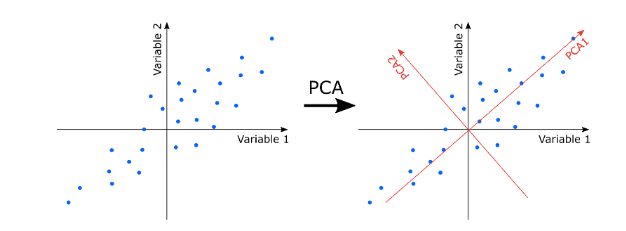

In [10]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [11]:
#Load the Dataset
iris = datasets.load_iris()
#convert the dataset into a pandas data frame
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
#display the head (first 5 rows) of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


<AxesSubplot:>

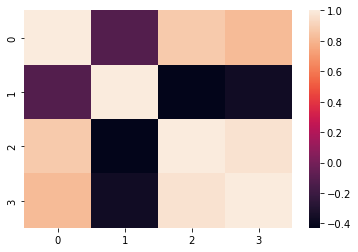

In [13]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())


In [14]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()


,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


<AxesSubplot:>

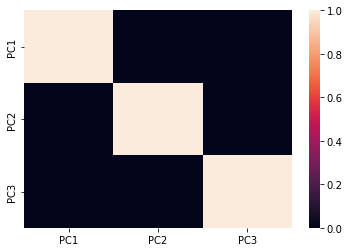

In [15]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())


### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

Principal Component Analysis (PCA) is a dimensionality reduction technique that is commonly used for feature extraction in machine learning and data analysis. Its primary goal is to reduce the number of features (dimensions) in a dataset while preserving as much of the important information as possible. PCA does this by identifying the principal components in the data, which are linear combinations of the original features. These principal components capture the most significant sources of variation in the data.

Here's how PCA can be used for feature extraction:

1. **Data Preparation**: Start with a dataset that has a high-dimensional feature space, where each feature represents a different attribute or variable. For example, you might have a dataset with features like age, income, education level, and so on.

2. **Standardization**: Before applying PCA, it's a good practice to standardize or normalize the data so that all features have the same scale. This step ensures that features with larger scales don't dominate the PCA process.

3. **PCA Application**: Apply PCA to the standardized data. PCA will transform the original features into a new set of features called principal components. These principal components are linear combinations of the original features, where each component represents a different direction in the high-dimensional space. The first principal component explains the most variance in the data, the second explains the second most variance, and so on.

4. **Feature Selection**: You can choose to keep a subset of the principal components that capture a sufficient amount of variance in the data. This is where feature extraction occurs. By selecting a subset of principal components, you effectively reduce the dimensionality of your dataset.

5. **Dimensionality Reduction**: The selected principal components become the new features of your dataset. These features are a reduced representation of the original data, but they still capture the most important information.

6. **Example**:

   Suppose you have a dataset with the following three features: age, income, and education level, and you want to perform feature extraction using PCA. After standardizing the data, you apply PCA and find that the first two principal components explain 95% of the variance in the data. You decide to keep only these two principal components as your new features.

   - The first principal component might be a combination of age, income, and education level that captures the most significant source of variation in your data.
   - The second principal component might capture a different combination of these features that accounts for the second most significant source of variation.

   Now, instead of using the original three features, you use the values of the first and second principal components as your new features for further analysis or modeling. These two principal components are a reduced representation of the original data and can often lead to more efficient and effective models.

In summary, PCA can be used for feature extraction by transforming high-dimensional data into a lower-dimensional representation while retaining the most important information in the dataset. This reduction in dimensionality can improve model performance and reduce the risk of overfitting, especially when dealing with datasets with a large number of features.

In [16]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data with three features: age, income, and education level
data = np.array([[35, 60000, 16],
                 [45, 75000, 20],
                 [28, 50000, 14],
                 [55, 82000, 22],
                 [32, 58000, 18]])

# Step 2: Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 3: Apply PCA
pca = PCA()
pca.fit(data_standardized)

# Step 4: Determine the number of components to keep
# In practice, you may choose a number of components that explain a certain percentage of variance
# For this example, let's say we want to keep the first two components
num_components = 2

# Step 5: Perform dimensionality reduction
reduced_data = pca.transform(data_standardized)[:, :num_components]

# The reduced_data now contains the new features obtained through PCA

# You can access the explained variance ratio for each component to assess their importance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

# You can also access the principal components themselves
principal_components = pca.components_

# Now 'reduced_data' contains the reduced features, and you can use them for further analysis or modeling
print("Reduced Data (first two components):\n", reduced_data)

Explained Variance Ratios: [0.97009573 0.02677066 0.0031336 ]
Reduced Data (first two components):
 [[-0.88866824 -0.23915291]
 [ 1.25547692  0.02595651]
 [-2.20325422 -0.20858466]
 [ 2.59823574 -0.11409785]
 [-0.76179021  0.53587892]]


### Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

Min-Max scaling, also known as feature scaling or normalization, is a preprocessing technique used to transform numerical features in a dataset to a specific range, typically between 0 and 1. This scaling method can be particularly useful when dealing with features that have different scales or units, as it helps ensure that all features contribute equally to machine learning models or algorithms. Here's how we would use Min-Max scaling to preprocess the data for your food delivery recommendation system project:

1. **Understand the Dataset**:
   Start by understanding the dataset, including the features you have, their data types, and their potential impact on the recommendation system. In your case, you mentioned features such as price, rating, and delivery time.


2. **Import Libraries**:
   Import the necessary libraries for data manipulation and scaling. In Python, you can use libraries like NumPy, pandas, and scikit-learn:

   ```python
   import numpy as np
   import pandas as pd
   from sklearn.preprocessing import MinMaxScaler
   ```


3. **Load and Prepare the Data**:
   Load our dataset into a pandas DataFrame and select the numerical features that need to be scaled. For instance:

   ```python
   # Assuming 'df' is your DataFrame and you want to scale 'price', 'rating', and 'delivery_time' columns
   numerical_features = ['price', 'rating', 'delivery_time']
   ```


4. **Initialize the Min-Max Scaler**:
   Create an instance of the MinMaxScaler:

   ```python
   scaler = MinMaxScaler()
   ```


5. **Fit and Transform the Data**:
   Fit the scaler to your selected features and then transform the data:

   ```python
   df[numerical_features] = scaler.fit_transform(df[numerical_features])
   ```

   This step scales the selected features to a range between 0 and 1 based on the minimum and maximum values in each feature.


6. **Check the Scaled Data**:
   Verify that the scaling has been applied correctly by examining the updated DataFrame. our selected features should now be scaled within the 0-1 range.


7. **Proceed with Recommendation System Development**:
   With the numerical features properly scaled, you can now use them as inputs to your recommendation system algorithm. Whether you're building a collaborative filtering model, content-based filtering, or a hybrid approach, having consistent and scaled features will help ensure that no single feature dominates the recommendation process due to its larger scale.


8. **Monitor Performance**:
   During the development and evaluation of your recommendation system, closely monitor its performance to ensure that the scaling of features has improved the model's effectiveness. Make adjustments as needed.



By using Min-Max scaling, we've made our numerical features comparable and have prepared them for use in your recommendation system. This preprocessing step helps ensure that each feature contributes meaningfully to the recommendation process, leading to better and more balanced recommendations.

### Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

Using Principal Component Analysis (PCA) to reduce the dimensionality of a dataset in the context of building a model to predict stock prices is a common technique to handle high-dimensional data and mitigate issues like multicollinearity. Here's a step-by-step guide on how we can apply PCA to reduce the dimensionality of your dataset:

1. **Understand Your Dataset**:
   Begin by thoroughly understanding your dataset. This includes identifying all the features you have, their data types, and their relevance to predicting stock prices. our dataset may contain financial metrics, market trends, and other factors that can potentially impact stock prices.


2. **Data Preprocessing**:
   Before applying PCA, we should perform necessary data preprocessing steps such as:
   - Handling missing data: Decide how to handle missing values, whether through imputation or removal.
   - Feature engineering: Create new features that may be more informative for stock price prediction.
   - Standardization: Standardize or normalize the data so that all features have the same scale. PCA is sensitive to the scale of the variables, so it's crucial to standardize them.


3. **Select the Features for PCA**:
   Identify the subset of features that you want to include in the PCA. You may choose to include all relevant features or a subset of them based on your domain knowledge and problem goals.


4. **Apply PCA**:
   Here's how we can apply PCA using Python and scikit-learn:

   ```python
   from sklearn.decomposition import PCA
   from sklearn.preprocessing import StandardScaler

   # Assuming 'X' is your feature matrix (e.g., financial data and market trends)
   
   # Step 1: Standardize the data
   scaler = StandardScaler()
   X_standardized = scaler.fit_transform(X)
   
   # Step 2: Apply PCA
   pca = PCA(n_components=desired_num_components)
   X_pca = pca.fit_transform(X_standardized)
   ```

   - In the code above, `StandardScaler` is used to standardize the data, ensuring all features have the same scale.
   - `PCA` is applied with the `n_components` parameter set to the desired number of principal components. You can choose this number based on the amount of variance you want to retain (e.g., 95% of variance) or based on domain knowledge.


5. **Examine Explained Variance**:
   After applying PCA, we can examine the explained variance ratio to understand how much variance is retained by each principal component. This information can help you decide how many principal components to keep. For example:

   ```python
   explained_variance_ratio = pca.explained_variance_ratio_
   ```


6. **Select the Number of Principal Components**:
   Based on the explained variance ratio and our project's requirements, choose the appropriate number of principal components to retain. we may aim to retain a certain percentage of variance (e.g., 95%) or a specific number of components.


7. **Feature Selection**:
   Use the selected principal components as our reduced feature set for stock price prediction. These components are a linear combination of the original features and capture the most significant sources of variance in the data.


8. **Build and Evaluate Your Model**:
   Train our stock price prediction model using the reduced feature set (principal components) and evaluate its performance. we can use various machine learning algorithms such as regression, time series models, or neural networks depending on the nature of the problem.


9. **Monitor and Fine-Tune**:
   Continuously monitor the performance of your model and consider fine-tuning our feature selection and model parameters as needed to improve prediction accuracy.



By using PCA, we can reduce the dimensionality of our dataset while retaining the most critical information, potentially improving the efficiency and interpretability of our stock price prediction model.

### Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

To perform Min-Max scaling on a dataset and transform the values to a range of -1 to 1, you need to follow these steps:


1. **Calculate the Min and Max Values**: Find the minimum and maximum values in your dataset.

   - Minimum value (Min): 1
   - Maximum value (Max): 20


2. **Apply the Min-Max Scaling Formula**:
   Use the Min-Max scaling formula to transform each data point (x) to the desired range:

   \[X_scaled = \frac{X - X_{min}}{X_{max} - X_{min}} \cdot (max - min) + min\]

   In your case, \(min = -1\) and \(max = 1\). Applying the formula:

   For each value in your dataset:
   - For X = 1:
     \[X_scaled = \frac{1 - 1}{20 - 1} \cdot (1 - (-1)) + (-1) = \frac{0}{19} \cdot 2 - 1 = -1\]
   - For X = 5:
     \[X_scaled = \frac{5 - 1}{20 - 1} \cdot (1 - (-1)) + (-1) = \frac{4}{19} \cdot 2 - 1 = -0.1053\]
   - For X = 10:
     \[X_scaled = \frac{10 - 1}{20 - 1} \cdot (1 - (-1)) + (-1) = \frac{9}{19} \cdot 2 - 1 = 0.5263\]
   - For X = 15:
     \[X_scaled = \frac{15 - 1}{20 - 1} \cdot (1 - (-1)) + (-1) = \frac{14}{19} \cdot 2 - 1 = 1.1579\]
   - For X = 20:
     \[X_scaled = \frac{20 - 1}{20 - 1} \cdot (1 - (-1)) + (-1) = \frac{19}{19} \cdot 2 - 1 = 2\]


So, the Min-Max scaled values for your dataset are as follows:
\[[-1, -0.1053, 0.5263, 1.1579, 2]\]

### Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

Deciding how many principal components to retain in a PCA analysis is an important step and depends on your specific goals and the variance explained by each principal component. Here's how you can approach this decision-making process:


1. **Standardization**:
   Before applying PCA, it's important to standardize or normalize your data, especially for features like height, weight, and age, which may have different units and scales compared to gender and blood pressure.


2. **Apply PCA**:
   Perform PCA on your dataset. The result will include information on the explained variance for each principal component. This information is crucial for deciding how many components to retain.


3. **Explained Variance Ratio**:
   The explained variance ratio for each principal component tells you the proportion of the total variance in the data that is explained by that component. Typically, you'll want to retain enough components to explain a substantial portion of the variance. A common threshold is to aim for a cumulative explained variance of around 95% or more.


4. **Cumulative Explained Variance**:
   Calculate the cumulative explained variance by summing the explained variance ratios as you move along the principal components. Stop adding components when the cumulative explained variance meets your threshold. For example, if you find that the first three principal components explain 90% of the variance, you might decide to retain those three.


5. **Interpretability vs. Dimension Reduction**:
   Consider the trade-off between dimensionality reduction and interpretability. More principal components may explain more variance but make your model more complex and less interpretable. Fewer components simplify your model but may lose some information. Choose a balance that suits your problem.


6. **Domain Knowledge**:
   Take into account domain knowledge. If certain features are known to be more relevant for your problem (e.g., blood pressure for a cardiovascular study), you might want to ensure that those features are well-represented in the retained principal components.


7. **Model Performance**:
   Evaluate the impact of retaining different numbers of principal components on your specific modeling task. You can use techniques like cross-validation to assess how well your model performs with different feature sets.


8. **Final Decision**:
   Based on the above considerations, make an informed decision on how many principal components to retain. It might be, for example, 2, 3, or more depending on your dataset and goals.


Remember that there is no one-size-fits-all answer to how many principal components to retain; it depends on the context of your project. The goal is to strike a balance between dimensionality reduction and preserving enough information to maintain model performance and interpretability.

In [30]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset with features: height, weight, age, gender, blood pressure
data = np.array([
    [170, 68, 30, 1, 120],
    [160, 55, 25, 0, 130],
    [180, 75, 35, 1, 140],
    [165, 60, 28, 0, 125],
    # Add more data points as needed
])

# Step 1: Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 2: Apply PCA
pca = PCA()
pca.fit(data_standardized)

# Step 3: Calculate explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Determine how many components to retain
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
threshold = 0.95  # Set your desired explained variance threshold (e.g., 95%)

# Find the index where cumulative variance exceeds the threshold
num_components_to_retain = np.argmax(cumulative_variance_ratio >= threshold) + 1

# Step 5: Retain the selected number of components
pca = PCA(n_components=num_components_to_retain)
data_pca = pca.fit_transform(data_standardized)

# Now 'data_pca' contains the dataset with reduced dimensionality based on the chosen number of components.
print("Number of components retained:", num_components_to_retain)
print("PCA-transformed data shape:", data_pca.shape)


Number of components retained: 2
PCA-transformed data shape: (4, 2)
